## Gold has been a symbol of wealth and a hedge against economic uncertainty for centuries. But can we predict its price using modern data science techniques? Let's dive into the data and find out.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
file_name ="Gold Price Prediction.csv"
print("current working directory:",os.getcwd())

if os.path.isfile(file_name):
    df=pd.read_csv(file_name)
    print (df.head())
else:
    print("file doesnt exist")    

current working directory: c:\Users\user\Desktop\projectt
     Date  Price 2 Days Prior  Price 1 Day Prior  Price Today  Price Tomorrow  \
0  8/7/24             2405.87            2384.90      2385.83             NaN   
1  8/6/24             2442.74            2405.87      2384.90         2385.83   
2  8/5/24             2447.17            2442.74      2405.87         2384.90   
3  8/2/24             2447.23            2447.17      2442.74         2405.87   
4  8/1/24             2411.09            2447.23      2447.17         2442.74   

   Price Change Tomorrow  Price Change Ten  Std Dev 10  Twenty Moving Average  \
0                    NaN               NaN   30.155078              2414.7450   
1                   0.93               NaN   29.423936              2414.1525   
2                 -20.97               NaN   28.341301              2413.2305   
3                 -36.87               NaN   28.616661              2411.0920   
4                  -4.43               NaN   26.08

## Initial Data Exploration

In [4]:
# Display the first few rows of the dataset
df.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59


## Data Preprocessing

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

## Correlation Heatmap

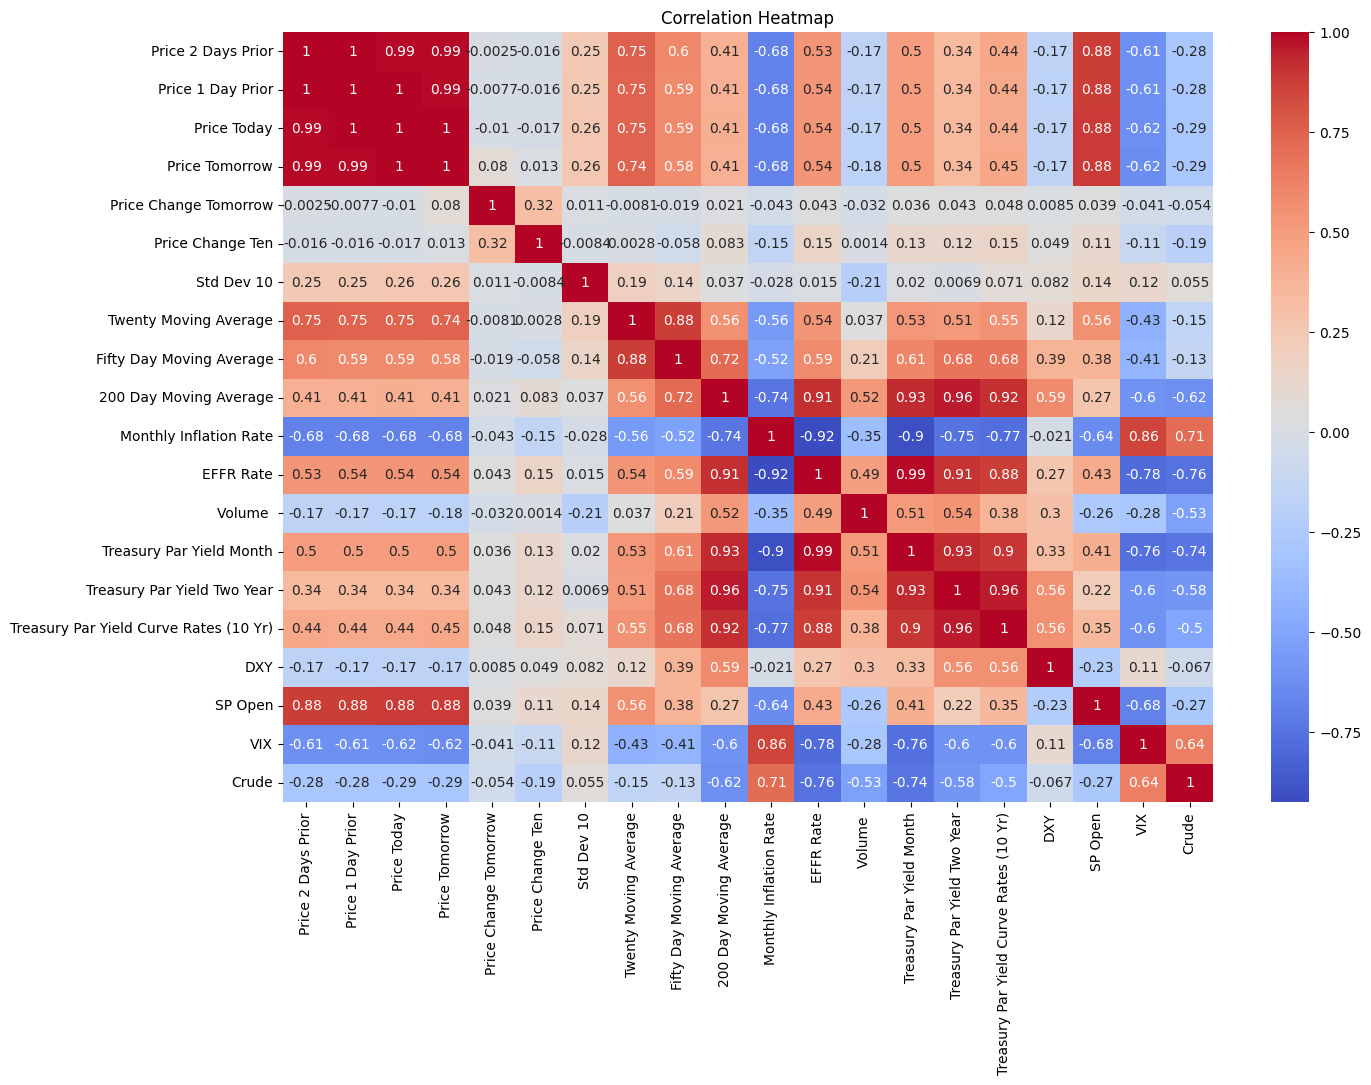

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Predicting Gold Price Tomorrow

In [8]:
# Drop rows with missing 'Price Tomorrow' values
df = df.dropna(subset=['Price Tomorrow'])

# Define features and target variable
X = df[['Price 2 Days Prior', 'Price 1 Day Prior', 'Price Today', 'Twenty Moving Average',
         'Fifty Day Moving Average', '200 Day Moving Average', 'Monthly Inflation Rate',
         'EFFR Rate', 'Volume ', 'Treasury Par Yield Month', 'Treasury Par Yield Two Year',
         'Treasury Par Yield Curve Rates (10 Yr)', 'DXY', 'SP Open', 'VIX', 'Crude']]
y = df['Price Tomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(386.88583089480676, 0.9908916144312526)